In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pandas.tseries.offsets import Day
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
baseurl = '/content/gdrive/MyDrive/bdc/'

final_train_url = baseurl + 'trainFinal_fktp.csv'
final_test_url = baseurl + 'testFinal_fktp.csv'
submsission_url = baseurl + 'submission.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_df_final = pd.read_csv(final_train_url, sep=',')
test_df_final = pd.read_csv(final_test_url, sep=',')

## DATA TRAIN

In [ ]:
# MEMISAHKAN ANTARA KOLOM FITUR DAN KOLOM TARGET
# data train
Y1 = train_df_final[['FKP13Class']]
X1 = train_df_final.drop(['FKP13Class'], axis=1)

# data test
Y2 = test_df_final[['FKP13Class']]
X2 = test_df_final.drop(['FKP13Class'], axis=1)

In [ ]:
# X1 = kolom fitur di data train
# X2 = kolom fitur di data test
 
print(X1.shape, Y1.shape, X2.shape, Y2.shape)

(4056898, 23) (4056898, 1) (1014225, 23) (1014225, 1)


In [ ]:
## UNDER SAMPLING PADA DATA TRAIN

## APAKAH DI DATA TEST PERLU DILAKUKAN UNDER SAMPLING JUGA?

# data train
rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled1, y_resampled1 = rus.fit_resample(X1, Y1)


In [ ]:
print(X_resampled1.shape, y_resampled1.shape)

(2844774, 23) (2844774, 1)


keterangan:
 * kami mencoba melakuan split train test terlebih dahulu, sebelum di PCA kan. berdasarkan refrensi berikut

 https://www.geeksforgeeks.org/principal-component-analysis-with-python/

In [ ]:
# Splitting the X and Y into the Training set and Testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled1, y_resampled1, test_size = 0.2, random_state = 42)


In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Applying PCA function on training
# and testing set of X component

from sklearn.decomposition import PCA

pca = PCA(n_components = 22)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# SETELAH DILAKUKAN PCA, JUMLAH KOLOM SUDAH MENJADI 22 KOLOM

print(X_train.shape, X_test.shape)

(2275819, 22) (568955, 22)


In [ ]:
# RANDOM FOREST
%%time
ran_forest = RandomForestClassifier(n_jobs=-1, random_state=0)
ran_forest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


CPU times: user 27min 27s, sys: 1.78 s, total: 27min 28s
Wall time: 7min 20s


RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
y_pred_rf = ran_forest.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9973864365371602
Precision 0.9981455986063893
Recall 0.9966369639394163
f1_score 0.9973907107900338


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


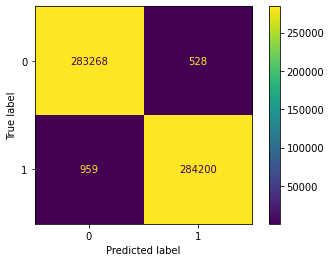

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

metrics.plot_confusion_matrix(ran_forest, X_test, y_test)

## DATA TEST

### Membandingkan kembali antara data train dan data test 

##### jumlah kolom dan baris

In [ ]:
print('shape dari data train : ', train_df_final.shape)
print('shape dari data test : ', test_df_final.shape)

shape dari data train :  (4056898, 24)
shape dari data test :  (1014225, 24)


##### preview data 

In [ ]:
# tidak ada missing value

train_df_final.head(5)

,DURASI,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,1,157978748,50765420,20.064983,61,6108,3,1,4,1,12,2,9999,0,0,0,98,9998,98,98,98,98,2,1
1,1,95085112,26931775,2.626307,51,5171,9,3,2,1,1,4,773,781,3609,3387,98,9998,98,98,98,98,1,0
2,1,224470578,227368233,1.051830,35,3516,9,2,1,1,3,4,1757,1775,9301,1878,98,9998,98,98,98,98,1,0
3,1,63871289,62313678,364.741455,34,3402,3,1,4,1,1,5,621,626,2852,2717,98,9998,98,98,98,98,1,0
4,1,29915626,113446188,1.050523,35,3509,3,1,4,1,1,1,622,627,2854,3738,98,9998,98,98,98,98,1,0


In [ ]:
test_df_final.head(5)

,DURASI,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,1,187883292,98048784,240.884842,31,3172,9,2,1,1,13,5,9999,0,0,0,98,9998,98,98,98,98,2,NaN
1,1,123307139,20969999,47.378571,17,1705,3,1,3,1,12,2,9999,0,0,0,98,9998,98,98,98,98,2,NaN
2,1,21416273,21416273,5.882927,64,6402,3,1,4,1,13,2,9999,0,0,0,98,9998,98,98,98,98,2,NaN
3,1,97630052,97630052,172.916031,18,1872,9,2,5,1,13,5,9999,0,0,0,98,9998,98,98,98,98,2,NaN
4,1,124531163,124531163,187.203140,18,1809,9,2,5,1,13,2,9999,0,0,0,98,9998,98,98,98,98,2,NaN


##### memastikan tidak ada outliers, dengan mengecek nilai min & percentil 1 dan nilai max dan percentil 99

In [ ]:
train_df_final.describe(percentiles=[0.01,0.99])

,DURASI,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
count,4056898.0,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06,4.056898e+06
mean,1.0,9.139622e+07,9.473470e+07,1.004495e+02,3.601993e+01,3.629545e+03,5.662804e+00,1.668892e+00,2.694622e+00,1.064594e+00,5.157594e+00,3.489451e+00,3.936404e+03,5.371167e+02,2.690931e+03,2.383764e+03,9.225260e+01,9.407877e+03,8.944729e+01,8.893204e+01,9.178286e+01,9.809351e+01,1.340221e+00,3.506095e-01
std,0.0,8.937931e+07,8.791377e+07,1.356704e+02,1.851048e+01,1.849375e+03,2.925104e+00,7.978220e-01,1.257199e+00,3.403495e-01,5.459467e+00,1.384493e+00,4.365481e+03,5.031130e+02,2.693428e+03,2.820682e+03,1.870446e+01,1.916485e+03,2.664296e+01,2.823298e+01,1.939427e+01,2.911491e-01,4.737833e-01,4.771609e-01
min,1.0,1.347153e+06,1.420097e+06,1.050523e+00,1.100000e+01,1.110000e+03,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.410000e+03,3.000000e+00,1.000000e+00,2.700000e+01,9.800000e+01,1.000000e+00,0.000000e+00
1%,1.0,1.347153e+06,1.420097e+06,1.050523e+00,1.100000e+01,1.110000e+03,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.410000e+03,3.000000e+00,1.000000e+00,2.700000e+01,9.800000e+01,1.000000e+00,0.000000e+00
50%,1.0,6.760764e+07,7.181594e+07,5.147561e+01,3.300000e+01,3.318000e+03,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,9.510000e+02,6.260000e+02,2.852000e+03,1.083000e+03,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,1.000000e+00,0.000000e+00
99%,1.0,4.262588e+08,4.242898e+08,7.827444e+02,8.200000e+01,8.201000e+03,9.000000e+00,4.000000e+00,6.000000e+00,3.000000e+00,1.300000e+01,5.000000e+00,9.999000e+03,1.783000e+03,9.354000e+03,9.488000e+03,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,1.000000e+00
max,1.0,4.262588e+08,4.242898e+08,7.827444e+02,8.200000e+01,8.201000e+03,9.000000e+00,4.000000e+00,6.000000e+00,3.000000e+00,1.300000e+01,5.000000e+00,9.999000e+03,1.836000e+03,9.664000e+03,9.659000e+03,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,1.000000e+00


In [ ]:
test_df_final.describe(percentiles=[0.01,0.99])

,DURASI,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
count,1014225.0,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,1.014225e+06,0.0
mean,1.0,9.146205e+07,9.477805e+07,1.005564e+02,3.602933e+01,3.630496e+03,5.661639e+00,1.668731e+00,2.695743e+00,1.065155e+00,5.167508e+00,3.491121e+00,3.944518e+03,5.018573e+02,1.993895e+03,1.661728e+03,9.227592e+01,9.410224e+03,8.946978e+01,8.895451e+01,9.179976e+01,9.809328e+01,1.341060e+00,NaN
std,0.0,8.939351e+07,8.799897e+07,1.358195e+02,1.852578e+01,1.850881e+03,2.925179e+00,7.981922e-01,1.257376e+00,3.418626e-01,5.462469e+00,1.384277e+00,4.367754e+03,4.656727e+02,1.943168e+03,1.979578e+03,1.866596e+01,1.912637e+03,2.660918e+01,2.820152e+01,1.936785e+01,2.908261e-01,4.740658e-01,NaN
min,1.0,1.361563e+06,1.454754e+06,1.050523e+00,1.100000e+01,1.110000e+03,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.409000e+03,3.000000e+00,1.000000e+00,2.700000e+01,9.800000e+01,1.000000e+00,NaN
1%,1.0,1.361563e+06,1.454754e+06,1.050523e+00,1.100000e+01,1.110000e+03,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,1.409000e+03,3.000000e+00,1.000000e+00,2.700000e+01,9.800000e+01,1.000000e+00,NaN
50%,1.0,6.769082e+07,7.177364e+07,5.158066e+01,3.300000e+01,3.318000e+03,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,9.510000e+02,5.880000e+02,2.158000e+03,7.520000e+02,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,1.000000e+00,NaN
99%,1.0,4.263673e+08,4.249000e+08,7.817990e+02,8.200000e+01,8.201000e+03,9.000000e+00,4.000000e+00,6.000000e+00,3.000000e+00,1.300000e+01,5.000000e+00,9.999000e+03,1.610000e+03,6.610000e+03,6.705000e+03,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,NaN
max,1.0,4.263673e+08,4.249002e+08,7.817990e+02,8.200000e+01,8.201000e+03,9.000000e+00,4.000000e+00,6.000000e+00,3.000000e+00,1.300000e+01,5.000000e+00,9.999000e+03,1.662000e+03,6.835000e+03,6.832000e+03,9.800000e+01,9.998000e+03,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,NaN


##### memastikan tidak ada missing value

In [ ]:
train_df_final.isnull().sum()

DURASI        0
PSTV01        0
PSTV02        0
PSTV15        0
FKP05         0
FKP06         0
FKP07         0
FKP08         0
FKP09         0
FKP10         0
FKP11         0
FKP12         0
FKP14         0
FKP14A        0
FKP15         0
FKP15A        0
FKP16         0
FKP17         0
FKP18         0
FKP19         0
FKP20         0
FKP21         0
FKP22         0
FKP13Class    0
dtype: int64

In [ ]:
train_df_final.isnull().sum()

DURASI        0
PSTV01        0
PSTV02        0
PSTV15        0
FKP05         0
FKP06         0
FKP07         0
FKP08         0
FKP09         0
FKP10         0
FKP11         0
FKP12         0
FKP14         0
FKP14A        0
FKP15         0
FKP15A        0
FKP16         0
FKP17         0
FKP18         0
FKP19         0
FKP20         0
FKP21         0
FKP22         0
FKP13Class    0
dtype: int64

###  Split antara feature dan target pada data test

In [ ]:
X2.columns.values

array(['DURASI', 'PSTV01', 'PSTV02', 'PSTV15', 'FKP05', 'FKP06', 'FKP07',
       'FKP08', 'FKP09', 'FKP10', 'FKP11', 'FKP12', 'FKP14', 'FKP14A',
       'FKP15', 'FKP15A', 'FKP16', 'FKP17', 'FKP18', 'FKP19', 'FKP20',
       'FKP21', 'FKP22'], dtype=object)

### PCA data test

In [ ]:
# sebelum di PCA wajib di standarisasikan dulu
X2_normalized = sc.transform(X2)

# Ganti 
# X2_pca = pca.transform(X2_normalized).values

# Menjadi
X2_pca = pca.transform(X2_normalized)

#### Model Predict

In [ ]:
y_predRF_test =ran_forest.predict(X2_pca)

In [ ]:
y_predRF_test

#### add to submission file

In [ ]:
# read submission

submit = pd.read_csv(submsission_url, sep=',')

In [ ]:
submit.head()

In [ ]:
submit['Status']  = pd.DataFrame(y_predRF_test)

In [ ]:
submit.rename(columns = {'Unnamed: 0':'A'}, inplace = True)

In [ ]:
submit['A'] = submit['A'].astype('str')
submit['A'] = submit['A'].map(lambda x: '\"' + x + '\"' )

In [ ]:
submit['FKP02'] = submit['FKP02'].astype('str')
submit['FKP02'] = submit['FKP02'].map(lambda x: '\"' + x + '\"' )

In [ ]:
submit.rename(columns = {"A" : '\"\"'}, inplace = True)

In [ ]:
submit.rename(columns = {"Status" : '\"Status\"'}, inplace = True)

In [ ]:
submit.rename(columns = {"FKP02" : '\"FKP02\"'}, inplace = True)

In [ ]:
submit.head()

In [ ]:
submit.iloc[:, 2].value_counts()

In [ ]:
import csv
submit.to_csv("sub2.csv",sep=',',index=False, quoting=csv.QUOTE_NONE)

In [ ]:
submit.isnull().sum()

""          0
"FKP02"     0
"Status"    0
dtype: int64

In [ ]:
print(sum(submit.iloc[:,2].value_counts()))

1014225


In [ ]:
test_df_final.head()

,DURASI,PSTV01,PSTV02,PSTV15,FKP05,FKP06,FKP07,FKP08,FKP09,FKP10,FKP11,FKP12,FKP14,FKP14A,FKP15,FKP15A,FKP16,FKP17,FKP18,FKP19,FKP20,FKP21,FKP22,FKP13Class
0,1,187883292,98048784,240.884842,31,3172,9,2,1,1,13,5,9999,0,0,0,98,9998,98,98,98,98,2,NaN
1,1,123307139,20969999,47.378571,17,1705,3,1,3,1,12,2,9999,0,0,0,98,9998,98,98,98,98,2,NaN
2,1,21416273,21416273,5.882927,64,6402,3,1,4,1,13,2,9999,0,0,0,98,9998,98,98,98,98,2,NaN
3,1,97630052,97630052,172.916031,18,1872,9,2,5,1,13,5,9999,0,0,0,98,9998,98,98,98,98,2,NaN
4,1,124531163,124531163,187.203140,18,1809,9,2,5,1,13,2,9999,0,0,0,98,9998,98,98,98,98,2,NaN
